In [10]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

from typing import Tuple

import matplotlib.pyplot as plt

import matplotlib as mpl

#import matplotlib.pyplot as plt

mpl.rc("figure", dpi=200)

from dt_computer_vision.camera import CameraModel

from dt_computer_vision.camera.calibration.extrinsics.boards import CalibrationBoard8by6
from dt_computer_vision.ground_projection.rendering import debug_image
from dt_computer_vision.ground_projection import GroundProjector

from dt_computer_vision.ground_projection.types import GroundPoint
from dt_computer_vision.camera import Pixel, NormalizedImagePoint

from dt_computer_vision.line_detection import LineDetector, ColorRange, Detections
from dt_computer_vision.line_detection.rendering import draw_segments



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
this_dir: str = os.path.abspath('')
assets_dir: str = os.path.join(this_dir, "..", "..", "assets", "notebooks", "project") #"project")
image_fpath: str = os.path.join(assets_dir, f"plus_intersection.png") #"intersection_ex.jpeg")
image_orig: np.ndarray = cv2.imread(image_fpath)
board = CalibrationBoard8by6

h,w,c = image_orig.shape
print(h,w,c)

"""
camera_properties = {
    "width": 640,
    "height": 480,
    "K": [[295.79606866959824, 0.0, 321.2621599038631],
          [0.0, 299.5389048862878, 241.73616515312332],
          [0.0, 0.0, 1.0]],
    "D": [-0.23543978771661125,
          0.03637781479419574,
          -0.0033069818601306755,
          -0.0012140708179525926,
          0.0],
    "P": [[201.14027404785156, 0.0, 319.5586620845679, 0.0],
          [0.0, 239.74398803710938, 237.60151004037834, 0.0],
          [0.0, 0.0, 1.0, 0.0]],
    # NOTE: this homography is computed in the 20-entrinsics-calibration jupyter notebook
    "H": [[-2.42749970e-02, 9.46389079e-02, 3.81909422e-01],
          [-4.55028567e-01, -1.17673909e-03, -1.87813039e-02],
          [-1.46006785e-01, 3.29784838e+00, 1]]
}

assert image_orig.shape == (480, 640, 3)
"""

669 892 3


'\ncamera_properties = {\n    "width": 640,\n    "height": 480,\n    "K": [[295.79606866959824, 0.0, 321.2621599038631],\n          [0.0, 299.5389048862878, 241.73616515312332],\n          [0.0, 0.0, 1.0]],\n    "D": [-0.23543978771661125,\n          0.03637781479419574,\n          -0.0033069818601306755,\n          -0.0012140708179525926,\n          0.0],\n    "P": [[201.14027404785156, 0.0, 319.5586620845679, 0.0],\n          [0.0, 239.74398803710938, 237.60151004037834, 0.0],\n          [0.0, 0.0, 1.0, 0.0]],\n    # NOTE: this homography is computed in the 20-entrinsics-calibration jupyter notebook\n    "H": [[-2.42749970e-02, 9.46389079e-02, 3.81909422e-01],\n          [-4.55028567e-01, -1.17673909e-03, -1.87813039e-02],\n          [-1.46006785e-01, 3.29784838e+00, 1]]\n}\n\nassert image_orig.shape == (480, 640, 3)\n'

In [12]:
# create camera

#camera = CameraModel(**camera_properties)
#projector = GroundProjector(camera)

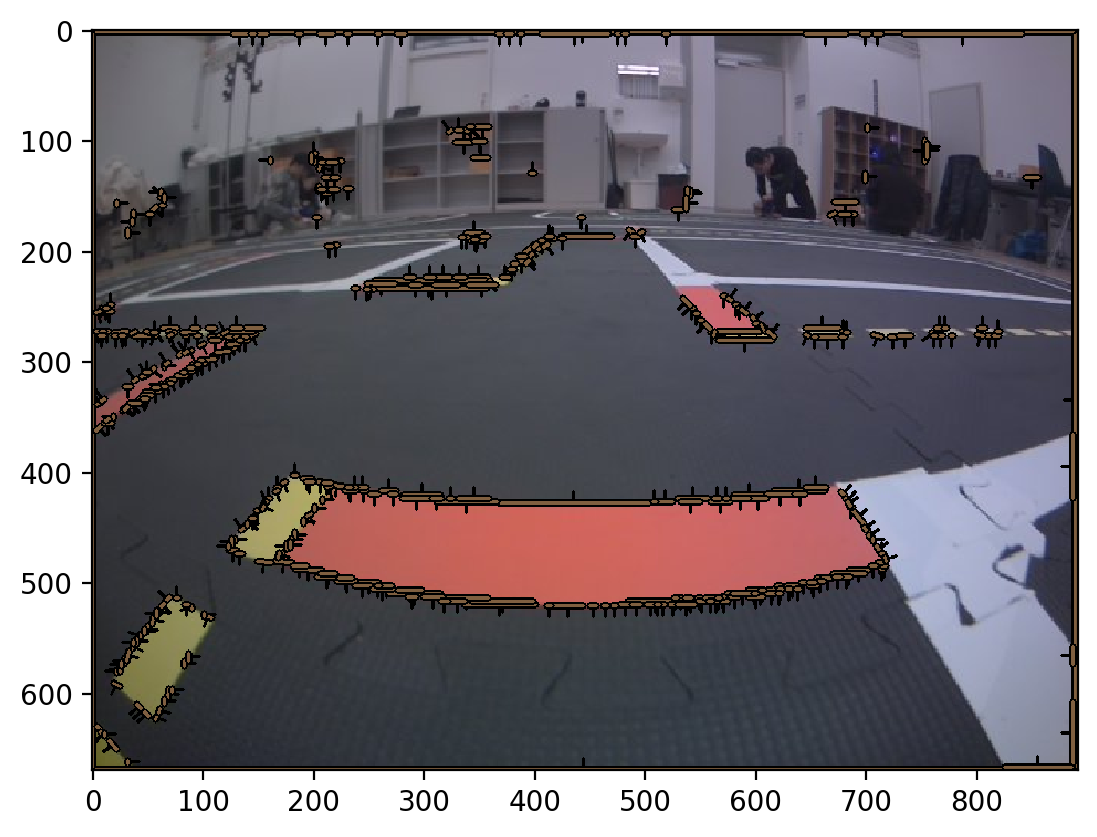

In [13]:
colors = {
    
    #"red": {
    #    "low_1": [0, 140, 100],
    #    "high_1": [15, 255, 255],
    #    "low_2": [165, 140, 100],
    #   "high_2": [180, 255, 255],
    #},
    
    "red": {
        "low_1": [0, 0, 0],
        "high_1": [30, 255, 255],
        "low_2": [165, 40, 10],
        "high_2": [180, 255, 255],
    },
    "white": {
        "low": [0, 0, 150],
        "high": [180, 100, 255]
    },
    "yellow": {
        "low": [25, 140, 100],
        "high": [45, 255, 255]
    }
}

def detect_color(image: np.ndarray, color: str) -> Tuple[Detections, np.ndarray]:
    detector: LineDetector = LineDetector()
    color_range: ColorRange = ColorRange.fromDict(colors[color])
    detections: Detections = detector.detect(image, [color_range])[0]
    image0_dets = draw_segments(image, {color_range: detections})
    return detections, image0_dets

color: str = "red"
segments, image_w_detections = detect_color(image_orig, color)

image_w_detections = cv2.cvtColor(image_w_detections, cv2.COLOR_BGR2RGB)
plt.imshow(image_w_detections)

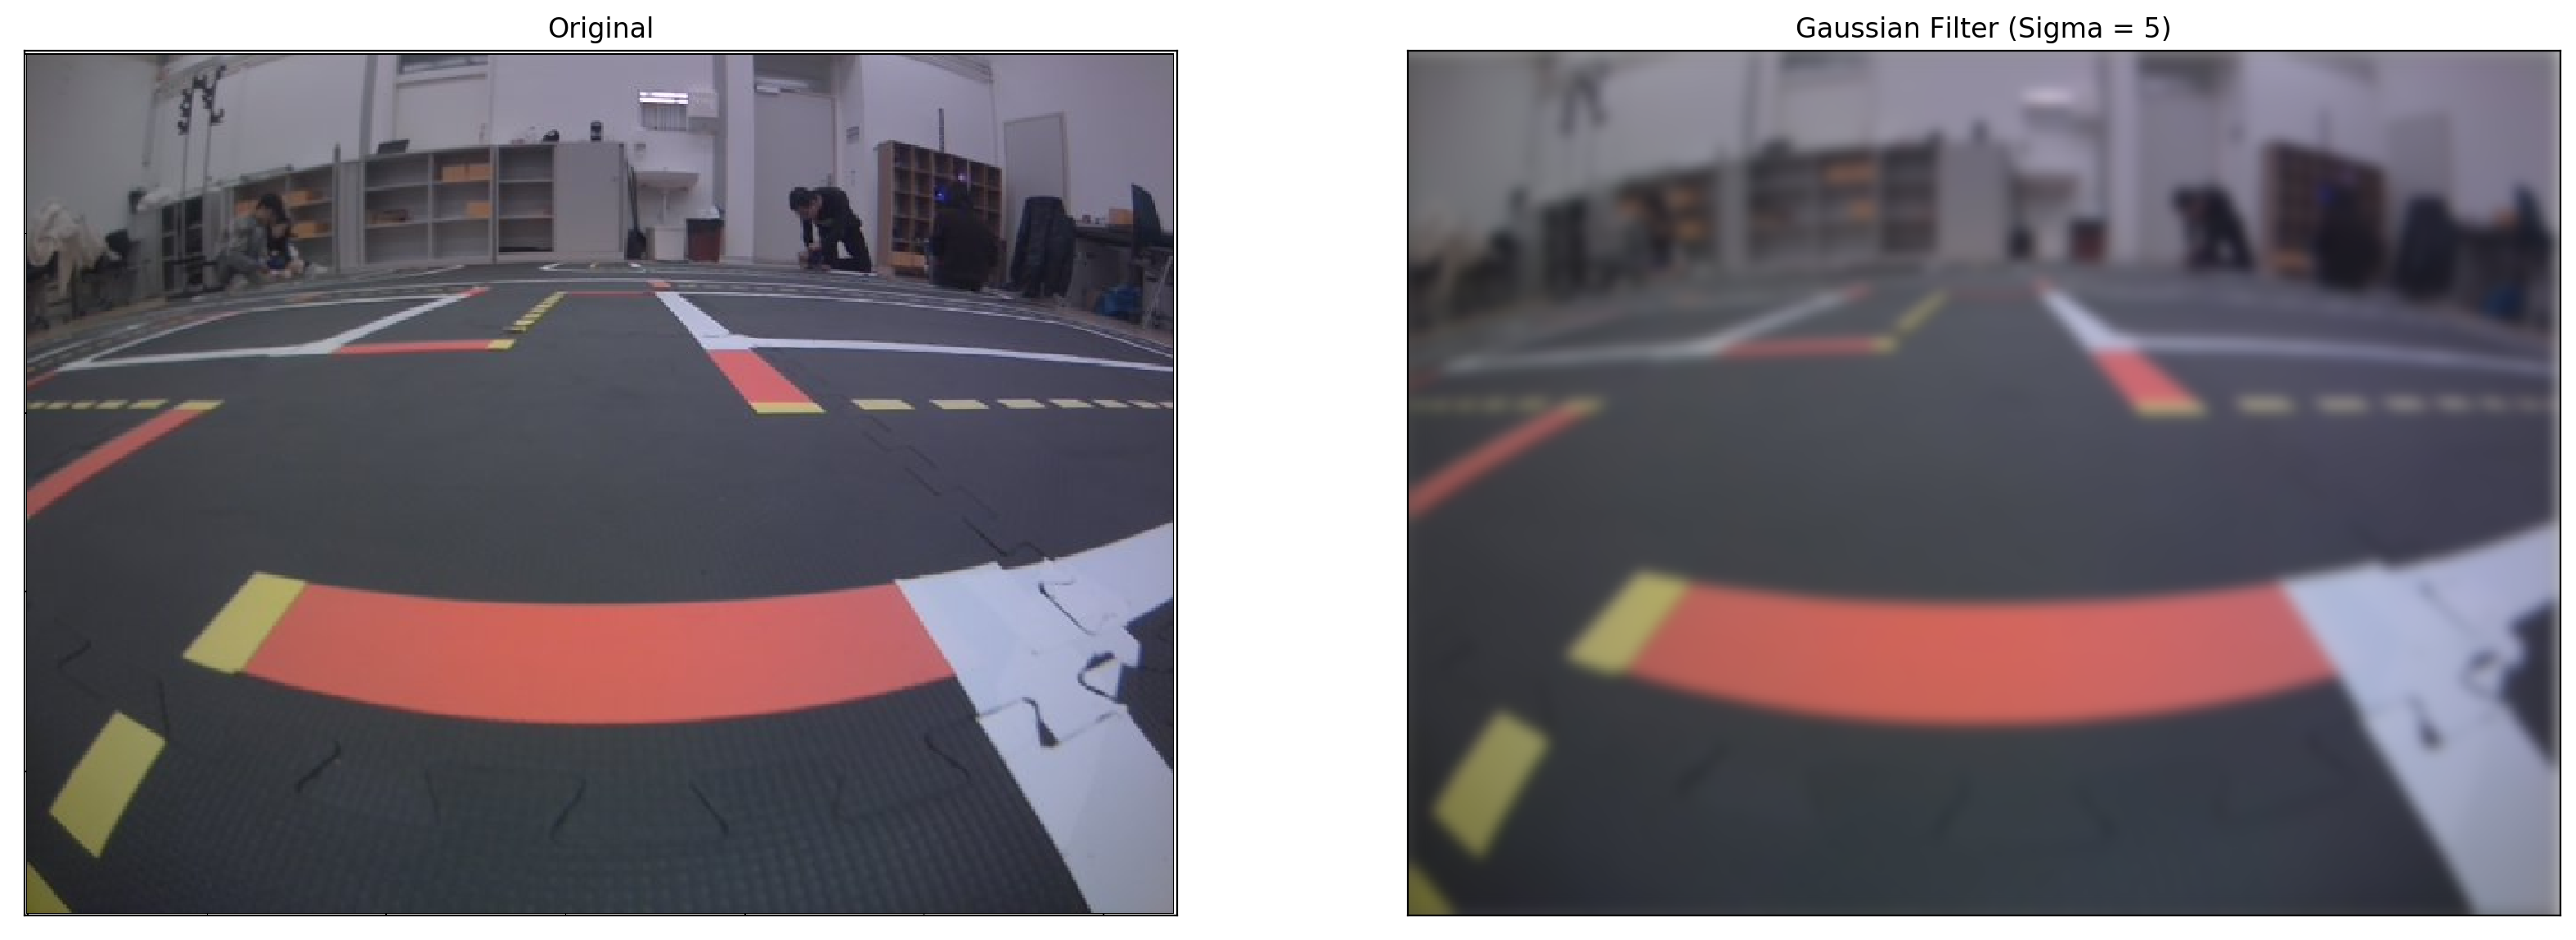

In [14]:
imgbgr = image_orig

imgrgb = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)

# Convert the image to HSV for any color-based filtering
imghsv = cv2.cvtColor(imgbgr , cv2.COLOR_BGR2HSV)

# Most of our operations will be performed on the grayscale version
img = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2GRAY)

sigma = 5 # CHANGE ME

# Smooth the image using a Gaussian kernel
img_gaussian_filter = cv2.GaussianBlur(imgrgb ,(0,0), sigma)

# Visualize the filtered image alongside the original image.
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(imgrgb ,cmap = 'gray')
ax1.set_title('Original'), ax1.set_xticks([]), ax1.set_yticks([])
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_gaussian_filter,cmap = 'gray')
ax2.set_title('Gaussian Filter (Sigma = ' + str(sigma) +')'), ax2.set_xticks([]), ax2.set_yticks([]);

# red object: 5
596748
Area: 49449.5 pixel
Area: 3238.5 pixel
Area: 2446.5 pixel
Area: 1537.5 pixel
# red object: 2
596748
(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), False, [False, False, False])


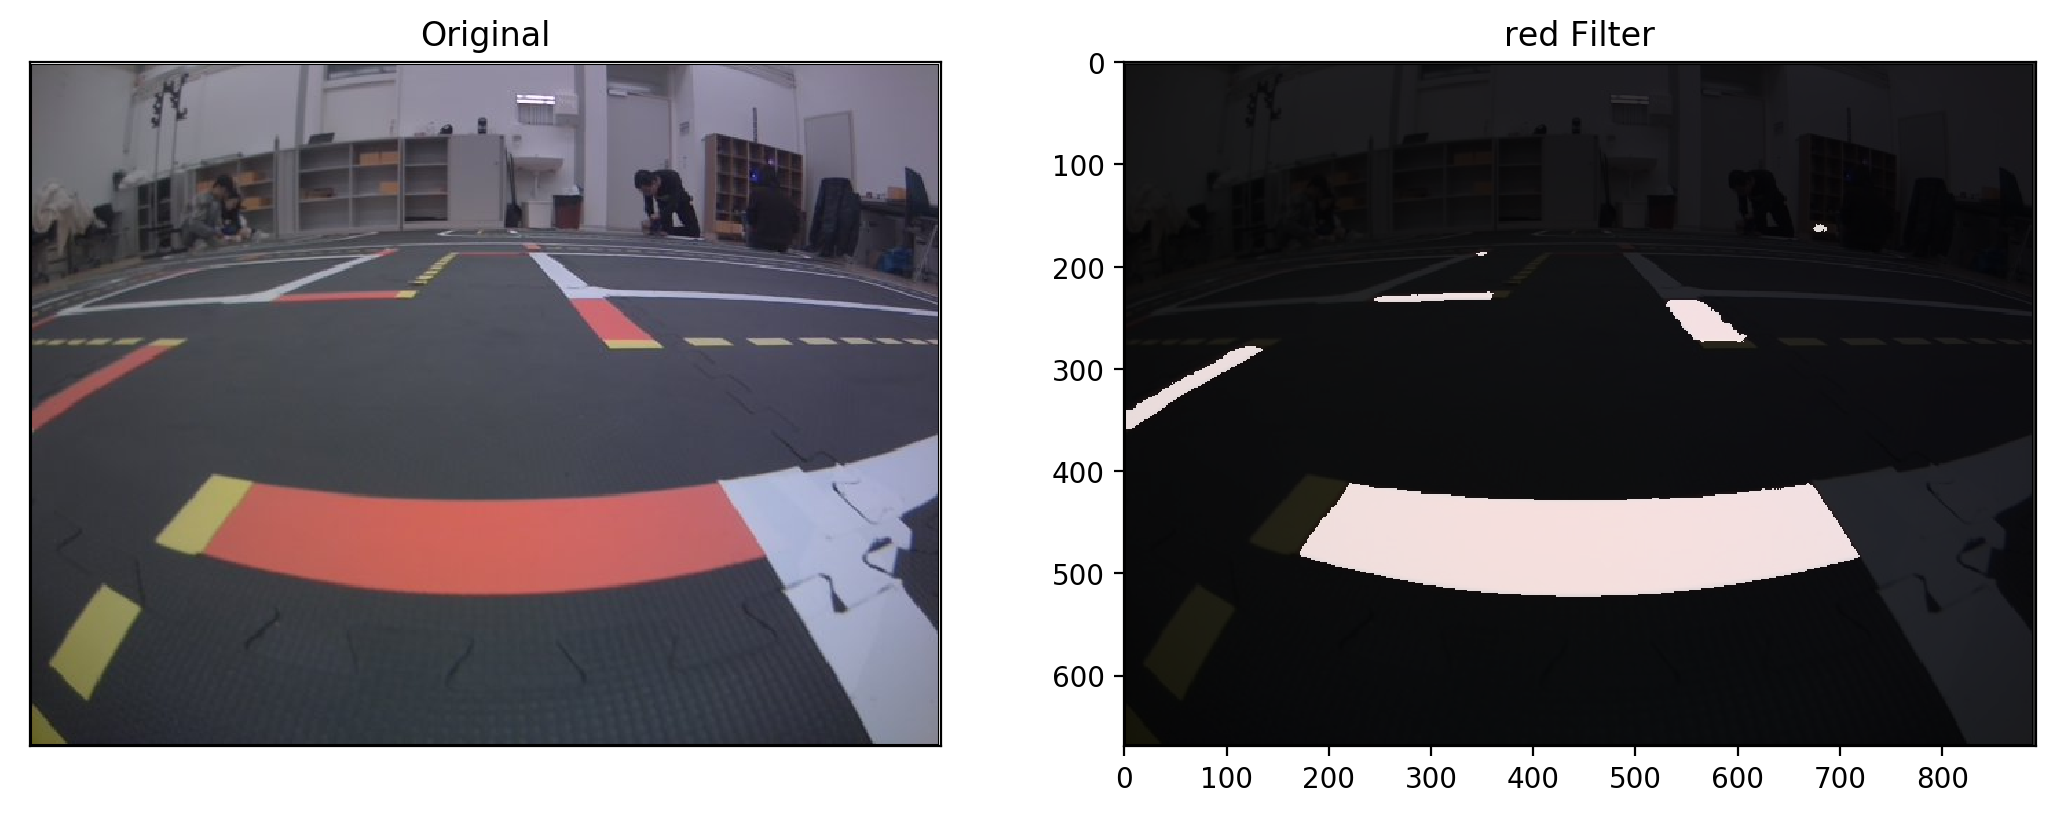

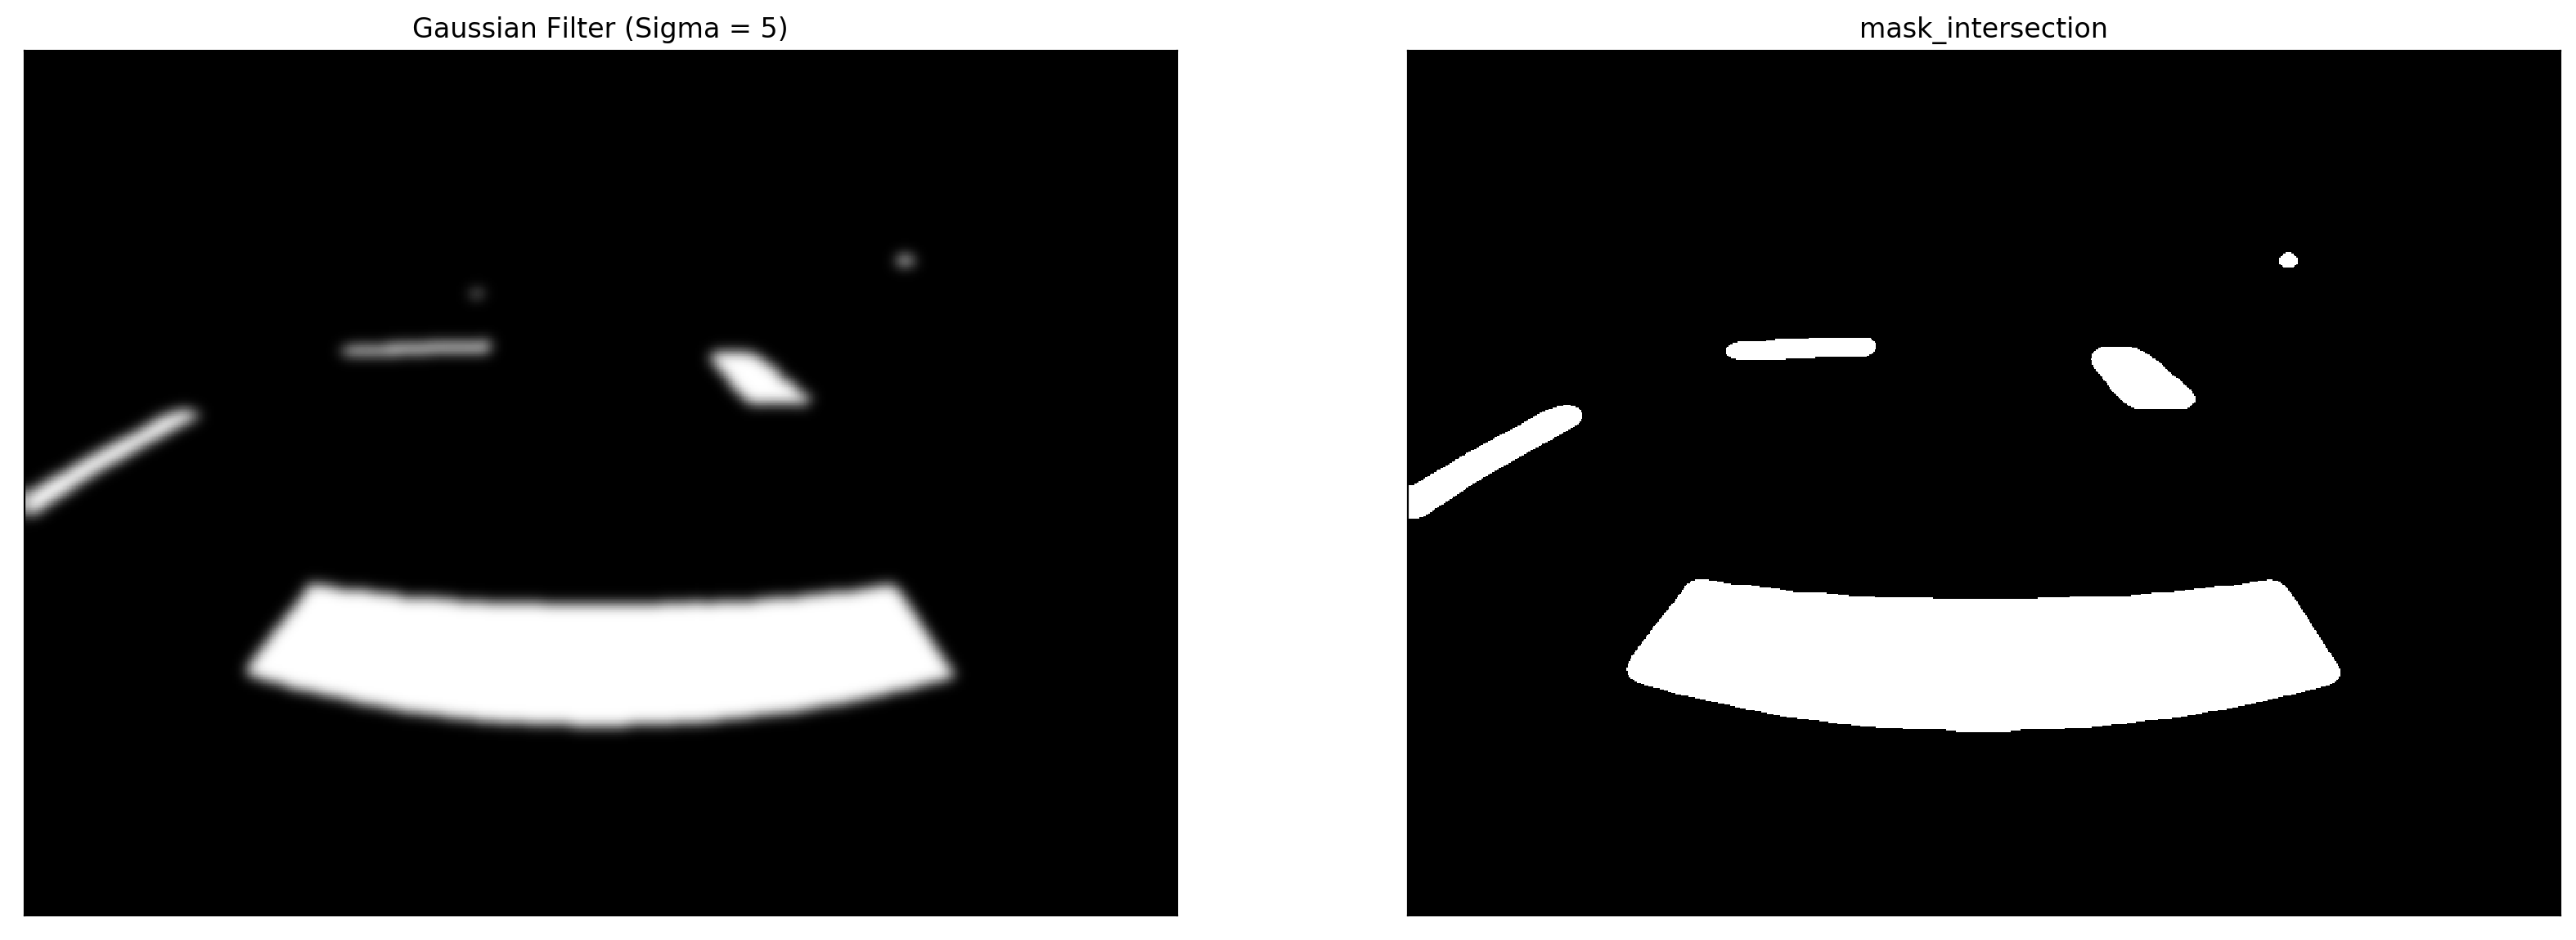

In [15]:
#mask_horizont = imghsv[np.arange(imghsv.shape[0]) < 400, :, :]
imghsv[:150, :, :] = 255

red_lower_hsv1 = np.array([0, 80, 100])         # CHANGE ME
red_upper_hsv1 = np.array([10, 255, 255])   # CHANGE ME

red_lower_hsv2 = np.array([160, 80, 100])         # CHANGE ME
red_upper_hsv2 = np.array([180, 255, 255])   # CHANGE ME



mask_red1 = cv2.inRange(imghsv, red_lower_hsv1, red_upper_hsv1)
mask_red2 = cv2.inRange(imghsv, red_lower_hsv2, red_upper_hsv2)

mask_red = cv2.bitwise_or(mask_red1, mask_red2)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(imgrgb)
ax1.set_title('Original'), ax1.set_xticks([]), ax1.set_yticks([]);
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(imgrgb)
ax2.imshow(mask_red, cmap='gray', alpha=0.8)
ax2.set_title('red Filter')



gaussian_filter = cv2.GaussianBlur(mask_red,(0,0), sigma)
mask_intersection = cv2.inRange(gaussian_filter, 50 , 255)

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(gaussian_filter,cmap='gray')
ax1.set_title('Gaussian Filter (Sigma = ' + str(sigma) +')'), ax1.set_xticks([]), ax1.set_yticks([]);
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(mask_intersection,cmap='gray')
ax2.set_title('mask_intersection'), ax2.set_xticks([]), ax2.set_yticks([])


contours, _ = cv2.findContours(mask_intersection, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

num_objects = len(contours)
print(f"# red object: {num_objects}")

area_tot = h*w
print(area_tot)
red_lines = 0
intersection = False
stop = False
for contour in contours:
    # Calcola l'area del contorno
    area = cv2.contourArea(contour)

    if area > area_tot/1000:
        red_lines += 1
        print(f'Area: {area} pixel')
if red_lines:
    intersection = True

from intersection_stop import intersection_stop_func

a = intersection_stop_func(imgrgb)
print(a)